In [1]:
import pandas as pd
import numpy as np
import optuna

1. Data Loading and Inspection

In [4]:
df = pd.read_csv("esg_scores_clustering.csv")

In [6]:
df

,Company,Sector,Country,Market_Cap_Billions,Carbon_Emissions,Renewable_Energy_Usage,Employee_Satisfaction,Diversity_Ratio,Board_Independence,CEO_Compensation_Ratio,ROE
0,Company_1,Finance,UK,69.84,123.56,72.67,41.81,0.24,0.76,66.56,4.87
1,Company_2,Consumer Goods,UK,9.96,165.67,36.31,56.98,0.39,0.45,134.58,15.83
2,Company_3,Consumer Goods,Germany,52.77,19.08,58.42,49.77,0.55,0.61,80.50,6.99
3,Company_4,Technology,India,68.57,126.19,44.37,64.85,0.25,0.72,89.95,12.87
4,Company_5,Energy,Japan,5.00,10.00,60.00,69.44,0.25,0.77,110.14,5.12
...,...,...,...,...,...,...,...,...,...,...,...
295,Company_296,Healthcare,UK,67.08,66.46,40.76,66.63,0.17,0.87,45.71,9.39
296,Company_297,Technology,Japan,5.00,98.38,62.30,59.19,0.19,0.83,68.35,10.76
297,Company_298,Utilities,Germany,77.16,71.78,32.55,84.47,0.38,0.48,84.04,1.64
298,Company_299,Consumer Goods,UK,48.17,34.78,76.76,48.25,0.17,0.82,113.23,15.45


2. Exploratory Data Analysis

1). Dataset Overview

Dataset Head -- To know the Top rows

In [11]:
df.head(5)

,Company,Sector,Country,Market_Cap_Billions,Carbon_Emissions,Renewable_Energy_Usage,Employee_Satisfaction,Diversity_Ratio,Board_Independence,CEO_Compensation_Ratio,ROE
0,Company_1,Finance,UK,69.84,123.56,72.67,41.81,0.24,0.76,66.56,4.87
1,Company_2,Consumer Goods,UK,9.96,165.67,36.31,56.98,0.39,0.45,134.58,15.83
2,Company_3,Consumer Goods,Germany,52.77,19.08,58.42,49.77,0.55,0.61,80.50,6.99
3,Company_4,Technology,India,68.57,126.19,44.37,64.85,0.25,0.72,89.95,12.87
4,Company_5,Energy,Japan,5.00,10.00,60.00,69.44,0.25,0.77,110.14,5.12


Dataset Tail -- To know the Bottom rows

In [14]:
df.tail(5)

,Company,Sector,Country,Market_Cap_Billions,Carbon_Emissions,Renewable_Energy_Usage,Employee_Satisfaction,Diversity_Ratio,Board_Independence,CEO_Compensation_Ratio,ROE
295,Company_296,Healthcare,UK,67.08,66.46,40.76,66.63,0.17,0.87,45.71,9.39
296,Company_297,Technology,Japan,5.00,98.38,62.30,59.19,0.19,0.83,68.35,10.76
297,Company_298,Utilities,Germany,77.16,71.78,32.55,84.47,0.38,0.48,84.04,1.64
298,Company_299,Consumer Goods,UK,48.17,34.78,76.76,48.25,0.17,0.82,113.23,15.45
299,Company_300,Consumer Goods,UK,34.01,27.88,64.71,54.08,0.26,0.41,30.00,8.10


Dataset Shape : To know number of Rows & Columns

In [17]:
df.shape

(300, 11)

In [19]:
print("Number of Rows:", df.shape[0])

Number of Rows: 300


In [21]:
print("Number of Columns:", df.shape[1])

Number of Columns: 11


Dataset Information & Data types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 300 non-null    object 
 1   Sector                  300 non-null    object 
 2   Country                 300 non-null    object 
 3   Market_Cap_Billions     300 non-null    float64
 4   Carbon_Emissions        300 non-null    float64
 5   Renewable_Energy_Usage  300 non-null    float64
 6   Employee_Satisfaction   300 non-null    float64
 7   Diversity_Ratio         300 non-null    float64
 8   Board_Independence      300 non-null    float64
 9   CEO_Compensation_Ratio  300 non-null    float64
 10  ROE                     300 non-null    float64
dtypes: float64(8), object(3)
memory usage: 25.9+ KB


Dataset Description -- Statistical summary for both Numerical & Categorical columns

In [27]:
df.describe(include='all')

,Company,Sector,Country,Market_Cap_Billions,Carbon_Emissions,Renewable_Energy_Usage,Employee_Satisfaction,Diversity_Ratio,Board_Independence,CEO_Compensation_Ratio,ROE
count,300,300,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
unique,300,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Company_1,Energy,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,53,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,52.102467,95.880300,40.736367,65.367900,0.354033,0.668333,101.893800,9.985000
std,NaN,NaN,NaN,27.617135,46.101294,21.159687,14.513787,0.146776,0.141341,39.232063,5.132901
min,NaN,NaN,NaN,5.000000,10.000000,5.460000,40.050000,0.100000,0.400000,30.000000,-2.360000
25%,NaN,NaN,NaN,31.867500,61.570000,25.092500,52.997500,0.240000,0.550000,75.857500,6.130000
50%,NaN,NaN,NaN,50.785000,93.050000,38.300000,65.875000,0.360000,0.670000,101.070000,10.105000
75%,NaN,NaN,NaN,69.857500,126.032500,57.245000,78.267500,0.480000,0.790000,128.892500,13.435000


2). Missing Values & their count percentages

In [30]:
missing_count = df.isnull().sum()

In [32]:
print(missing_count)

Company                   0
Sector                    0
Country                   0
Market_Cap_Billions       0
Carbon_Emissions          0
Renewable_Energy_Usage    0
Employee_Satisfaction     0
Diversity_Ratio           0
Board_Independence        0
CEO_Compensation_Ratio    0
ROE                       0
dtype: int64


In [34]:
percentage_missing = (missing_count/len(df))*100

In [36]:
print(percentage_missing)

Company                   0.0
Sector                    0.0
Country                   0.0
Market_Cap_Billions       0.0
Carbon_Emissions          0.0
Renewable_Energy_Usage    0.0
Employee_Satisfaction     0.0
Diversity_Ratio           0.0
Board_Independence        0.0
CEO_Compensation_Ratio    0.0
ROE                       0.0
dtype: float64


3).  Duplicate data detection
-- check duplicates
-- view duplicates if needed

In [39]:
#view duplicates, if needed
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Company, Sector, Country, Market_Cap_Billions, Carbon_Emissions, Renewable_Energy_Usage, Employee_Satisfaction, Diversity_Ratio, Board_Independence, CEO_Compensation_Ratio, ROE]
Index: []


In [41]:
#Check number of duplicates
df.duplicated().sum()

0

4). Drop unncesseary columns  

In [44]:
df = df.drop('Company', axis=1)

In [46]:
df.head(2)

,Sector,Country,Market_Cap_Billions,Carbon_Emissions,Renewable_Energy_Usage,Employee_Satisfaction,Diversity_Ratio,Board_Independence,CEO_Compensation_Ratio,ROE
0,Finance,UK,69.84,123.56,72.67,41.81,0.24,0.76,66.56,4.87
1,Consumer Goods,UK,9.96,165.67,36.31,56.98,0.39,0.45,134.58,15.83


In [48]:
numerical_col = df.select_dtypes(include=['int64', 'float64'])

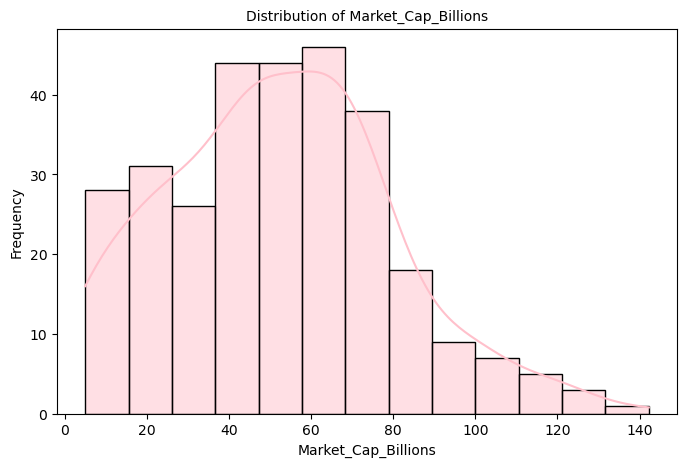

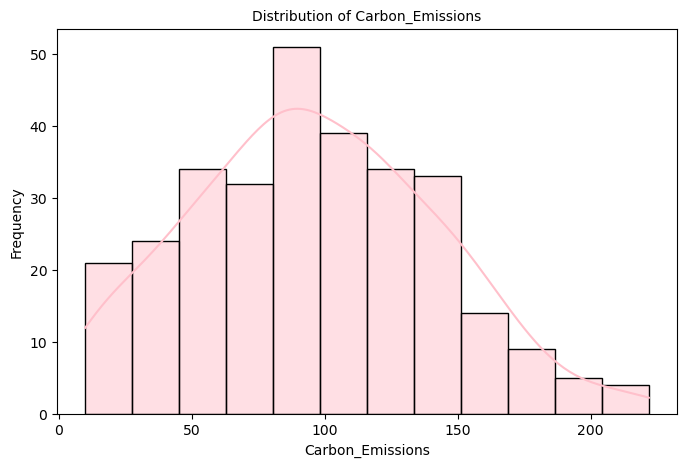

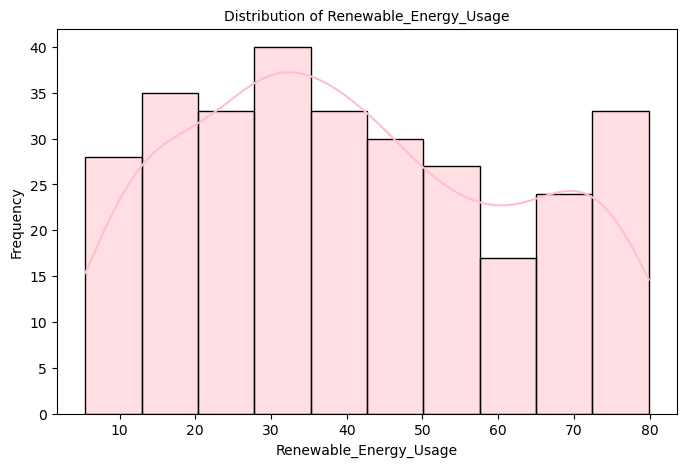

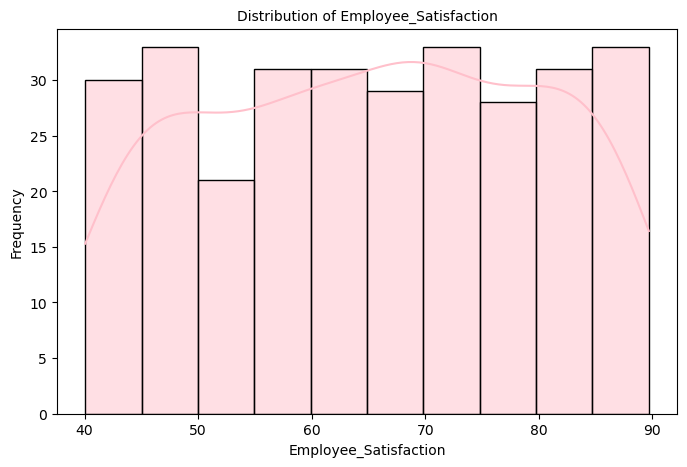

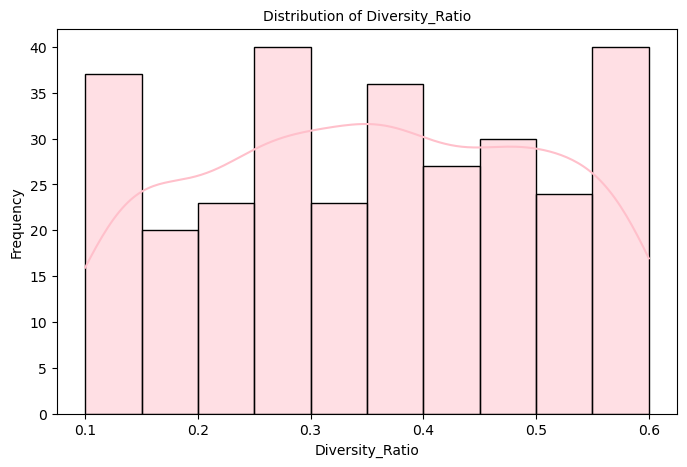

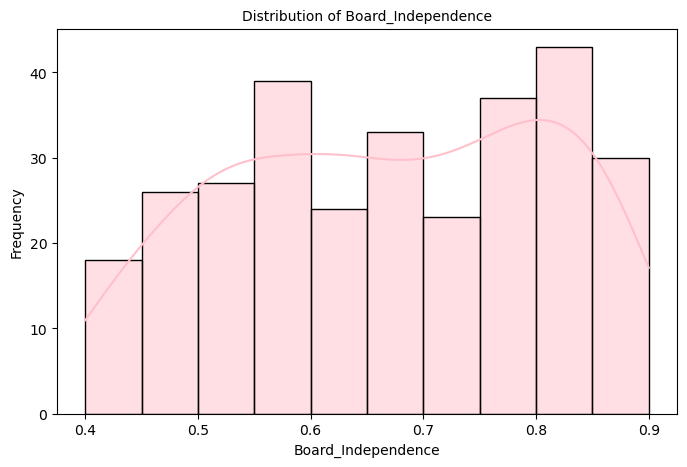

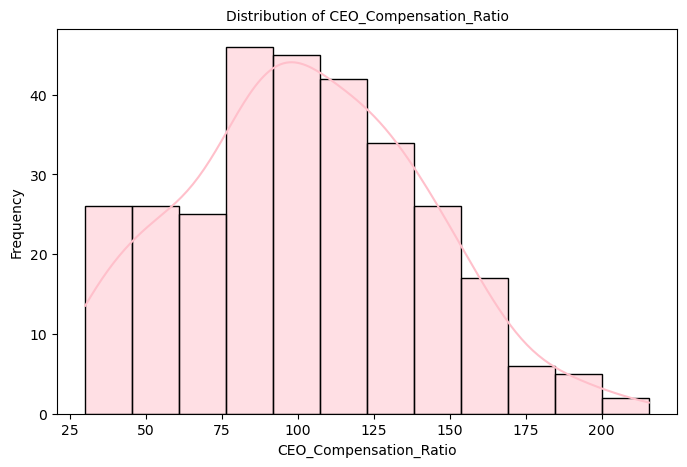

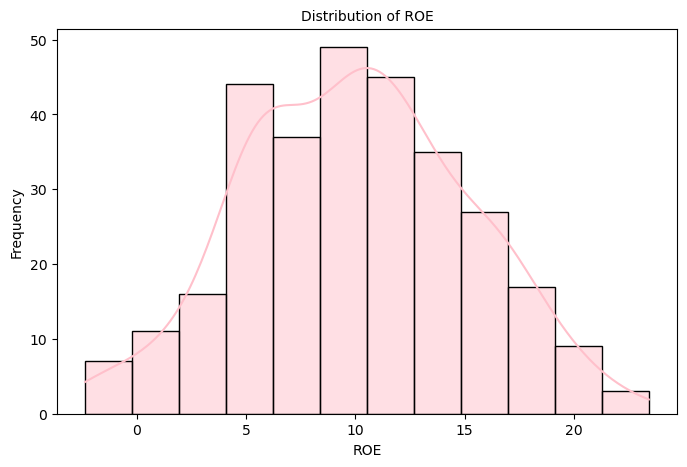

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_col:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, color='pink')

    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

5). Categorical Features -- Univariate Analysis

In [52]:
categorical_col = df.select_dtypes(include=['object', 'category'])

C:\Users\venuk\AppData\Local\Temp\ipykernel_21812\3342085539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],color='pink',palette='Set2')


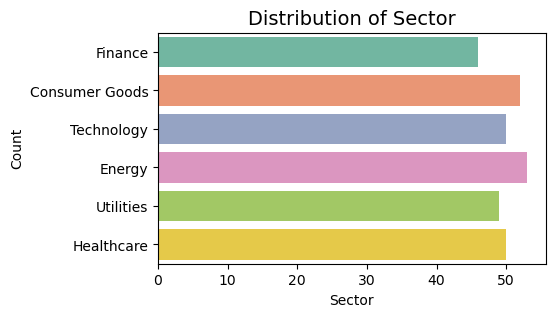

C:\Users\venuk\AppData\Local\Temp\ipykernel_21812\3342085539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],color='pink',palette='Set2')


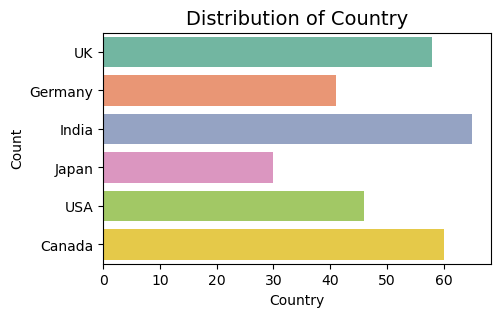

In [55]:
for col in categorical_col:
    plt.figure(figsize=(5,3))
    sns.countplot(df[col],color='pink',palette='Set2')

    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

6). Outlier Detection using Boxplots

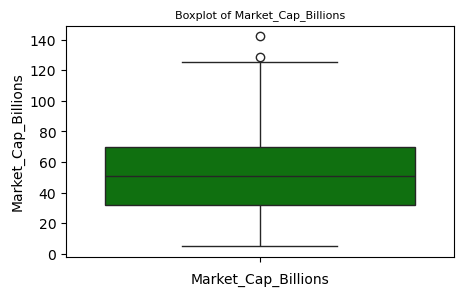

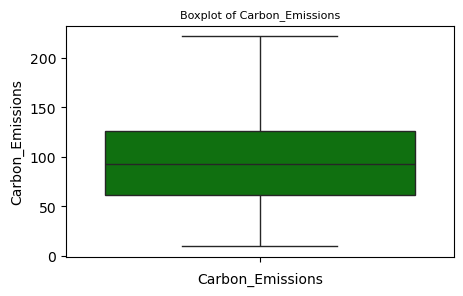

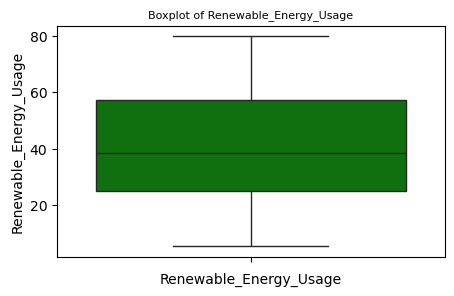

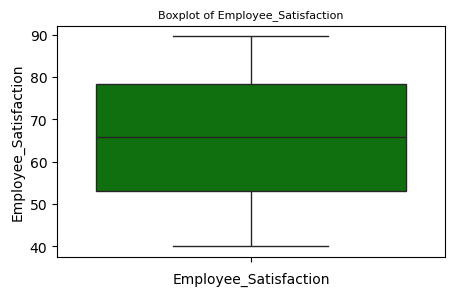

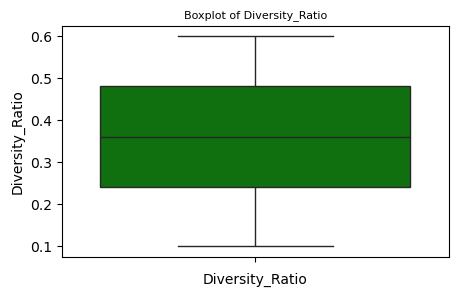

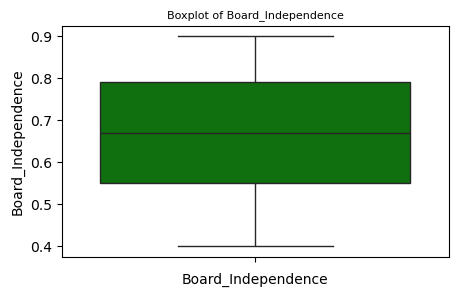

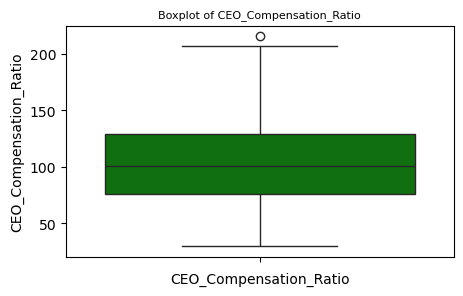

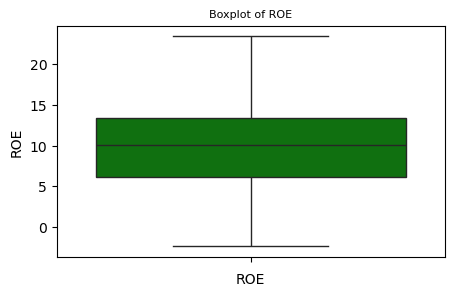

In [58]:
for col in numerical_col:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col],color='green')

    plt.title(f'Boxplot of {col}', fontsize=8)
    plt.xlabel(col)
    plt.show()

7). Correlation Heatmap
-- To identify highly correlated variables, causes Multicollinearity problems

In [61]:
corr_matrix = numerical_col.corr()
print(corr_matrix)

                        Market_Cap_Billions  Carbon_Emissions  \
Market_Cap_Billions                1.000000          0.061629   
Carbon_Emissions                   0.061629          1.000000   
Renewable_Energy_Usage             0.027540         -0.040680   
Employee_Satisfaction              0.079811          0.176229   
Diversity_Ratio                   -0.033959         -0.002252   
Board_Independence                 0.002462          0.026411   
CEO_Compensation_Ratio            -0.020031          0.081384   
ROE                               -0.064613          0.111178   

                        Renewable_Energy_Usage  Employee_Satisfaction  \
Market_Cap_Billions                   0.027540               0.079811   
Carbon_Emissions                     -0.040680               0.176229   
Renewable_Energy_Usage                1.000000               0.001214   
Employee_Satisfaction                 0.001214               1.000000   
Diversity_Ratio                      -0.019205   

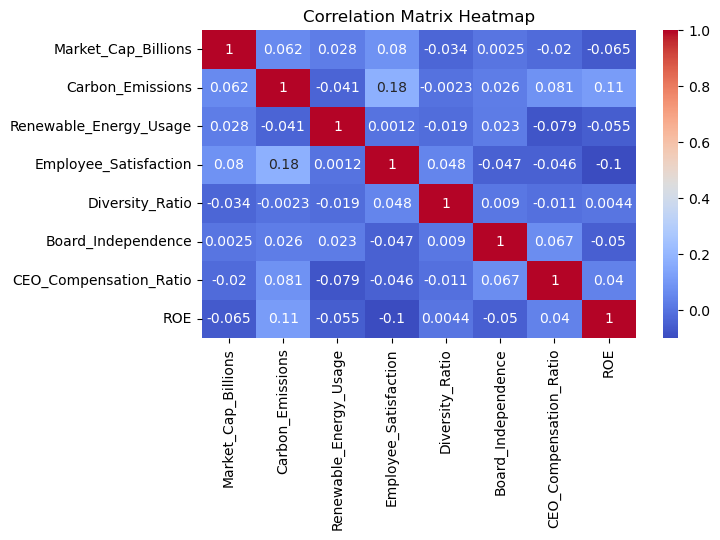

In [63]:
plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

8). Skewness and Kurtosis

In [66]:
for col in numerical_col:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col} : Skewness = {skewness:.4f}, Kurtosis = {kurtosis : .4f}")

Market_Cap_Billions : Skewness = 0.3434, Kurtosis = -0.0511
Carbon_Emissions : Skewness = 0.1949, Kurtosis = -0.4114
Renewable_Energy_Usage : Skewness = 0.2098, Kurtosis = -1.0746
Employee_Satisfaction : Skewness = -0.0553, Kurtosis = -1.1770
Diversity_Ratio : Skewness = -0.0341, Kurtosis = -1.1540
Board_Independence : Skewness = -0.1358, Kurtosis = -1.1560
CEO_Compensation_Ratio : Skewness = 0.1640, Kurtosis = -0.3756
ROE : Skewness = 0.0269, Kurtosis = -0.3629


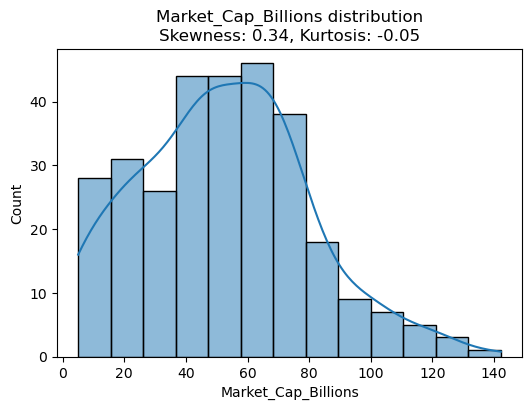

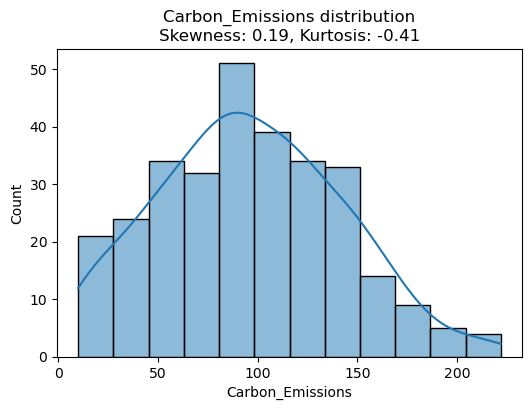

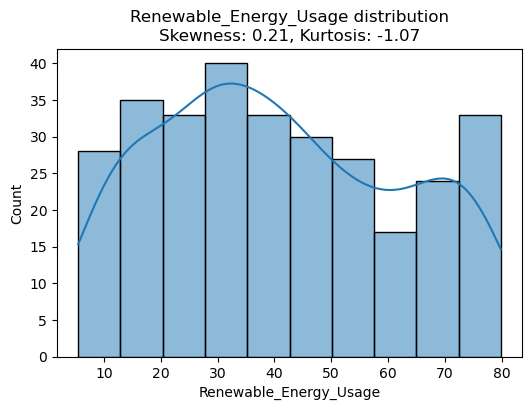

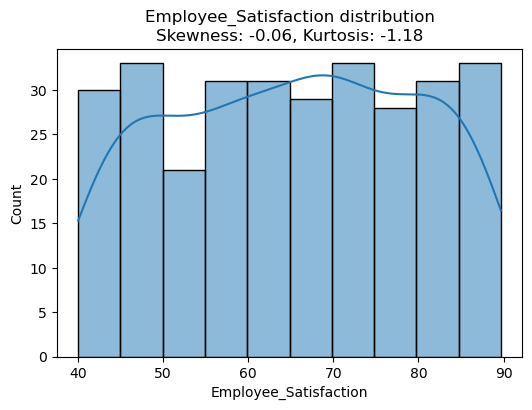

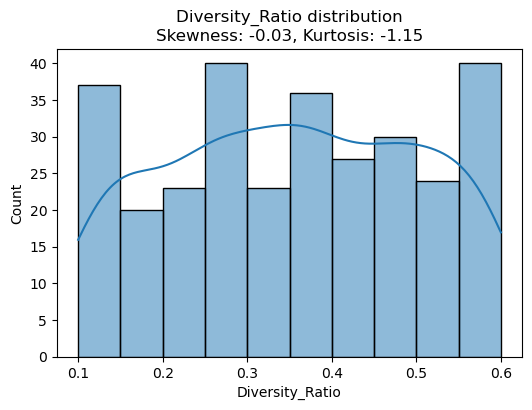

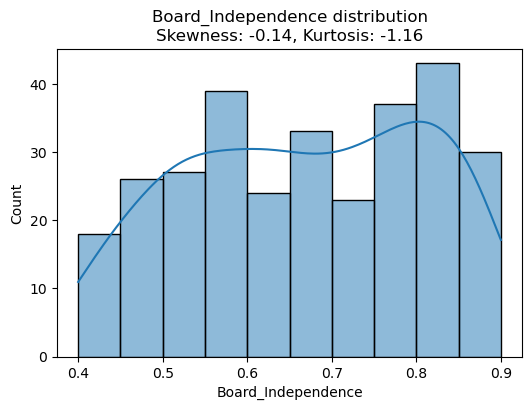

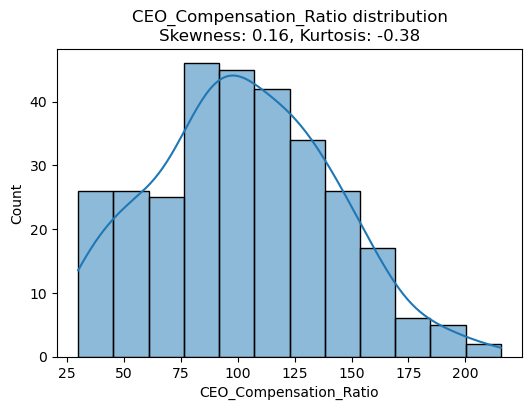

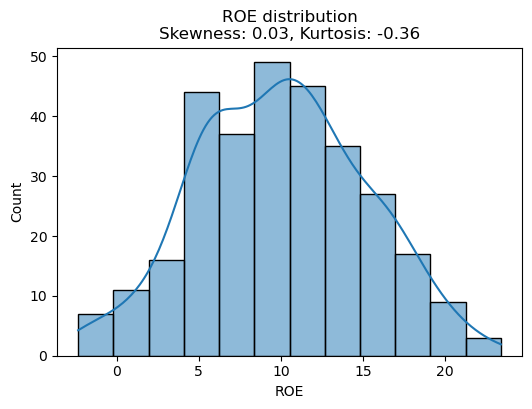

In [68]:
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution\nSkewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurtosis(): .2f}')
    plt.show()

In [70]:
#Encoding needs to be performed and is done at Data Cleaning step

In [72]:
#Need to scale the numerical cols after done with Encoding

In [74]:
df.columns

Index(['Sector', 'Country', 'Market_Cap_Billions', 'Carbon_Emissions',
       'Renewable_Energy_Usage', 'Employee_Satisfaction', 'Diversity_Ratio',
       'Board_Independence', 'CEO_Compensation_Ratio', 'ROE'],
      dtype='object')

3. Data Cleaning and Preprocessing

1). Handle duplicate records

In [78]:
#No duplicates, if exist need to remove using first occurrence, last occurrence by keep=last or drop column wise

2). Consistent column names

In [81]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [83]:
df.columns

Index(['sector', 'country', 'market_cap_billions', 'carbon_emissions',
       'renewable_energy_usage', 'employee_satisfaction', 'diversity_ratio',
       'board_independence', 'ceo_compensation_ratio', 'roe'],
      dtype='object')

3). Handle missing values

In [86]:
# No missing values found, if present have to deal with percentages_count and replacement with Mean/Median/Mode based on criteria or drop them

4). Handle invalid or impossible values

In [89]:
# No invalid or impossible values found, if present deal with removing or replacement of statistical methods

5). Correct data types

In [92]:
#Replacing obj with category for memory usage purposes
df['sector'] = df['sector'].astype('category')
df['country'] = df['country'].astype('category')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   sector                  300 non-null    category
 1   country                 300 non-null    category
 2   market_cap_billions     300 non-null    float64 
 3   carbon_emissions        300 non-null    float64 
 4   renewable_energy_usage  300 non-null    float64 
 5   employee_satisfaction   300 non-null    float64 
 6   diversity_ratio         300 non-null    float64 
 7   board_independence      300 non-null    float64 
 8   ceo_compensation_ratio  300 non-null    float64 
 9   roe                     300 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 19.9 KB


6). Outlier treatment

In [97]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [99]:
df['carbon_emissions'] = pt.fit_transform(df[['carbon_emissions']])

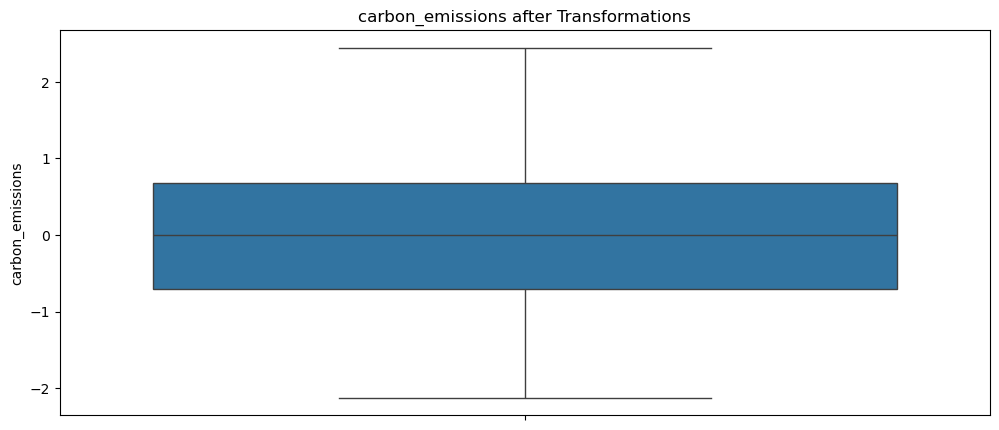

In [101]:
plt.figure(figsize=(12,5))
sns.boxplot(df['carbon_emissions'])
plt.title('carbon_emissions after Transformations')
plt.show()

In [103]:
df['ceo_compensation_ratio'] = pt.fit_transform(df[['ceo_compensation_ratio']])

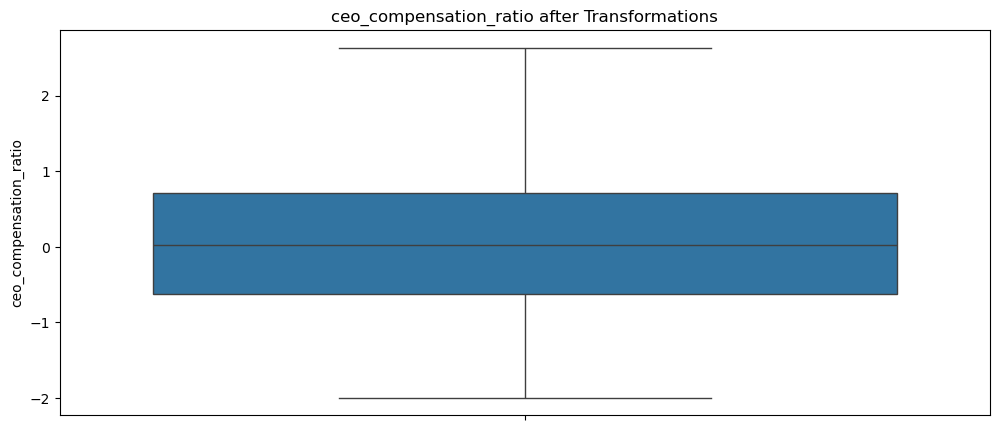

In [105]:
plt.figure(figsize=(12,5))
sns.boxplot(df['ceo_compensation_ratio'])
plt.title('ceo_compensation_ratio after Transformations')
plt.show()

In [107]:
df['roe'] = pt.fit_transform(df[['roe']])

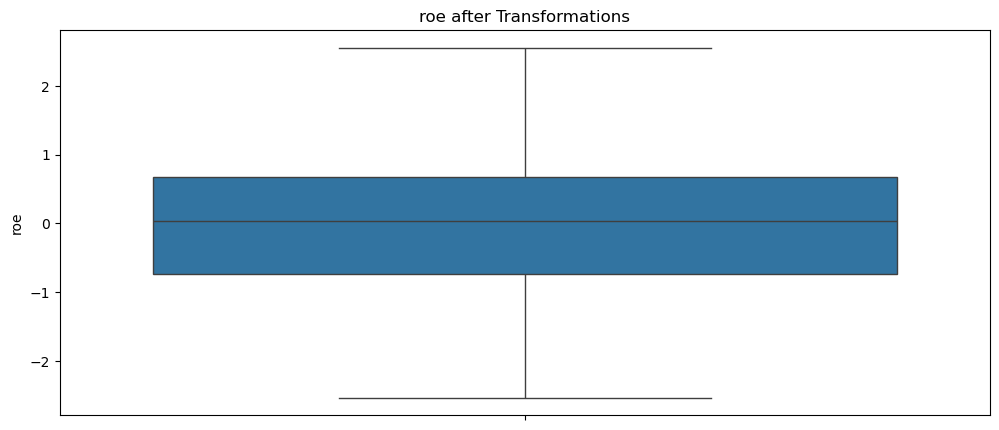

In [109]:
plt.figure(figsize=(12,5))
sns.boxplot(df['roe'])
plt.title('roe after Transformations')
plt.show()

# Even after transformations, outliers are due to compression to the mean and extreme values. can be decoded with capping and transformations if needed

8). PCA Implementation & Check

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.decomposition import PCA
#Define Transformers
#Pipeline for Categorical (Encoding + Scaling) -- Due to clusters densities issues

In [116]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [118]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [120]:
#Combine using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols),
                                               ('cat', Pipeline([('onehot', OneHotEncoder(drop='first')),('scaler', StandardScaler(with_mean=False))]), categorical_cols)])

In [122]:
#Full pipeline with PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=0.95))]) #If less features comment out for not to use pca, proceed only with pipeline

In [124]:
#Fit and transform data
processed_data = pipeline.fit_transform(df)

In [126]:
#Access PCA step from pipeline
pca_step = pipeline.named_steps['pca']

In [128]:
#explained variance ratio
explained_variance = pca_step.explained_variance_ratio_

In [130]:
print(explained_variance)

[0.0851809  0.07984106 0.0752555  0.07455307 0.07248    0.06949351
 0.06336302 0.06144072 0.06005789 0.0565371  0.05425993 0.05210735
 0.04930869 0.04571303 0.04113247 0.03570742]


In [132]:
#Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

In [134]:
print(cumulative_variance)

[0.0851809  0.16502196 0.24027746 0.31483053 0.38731054 0.45680405
 0.52016707 0.58160779 0.64166567 0.69820277 0.75246271 0.80457005
 0.85387874 0.89959177 0.94072424 0.97643166]


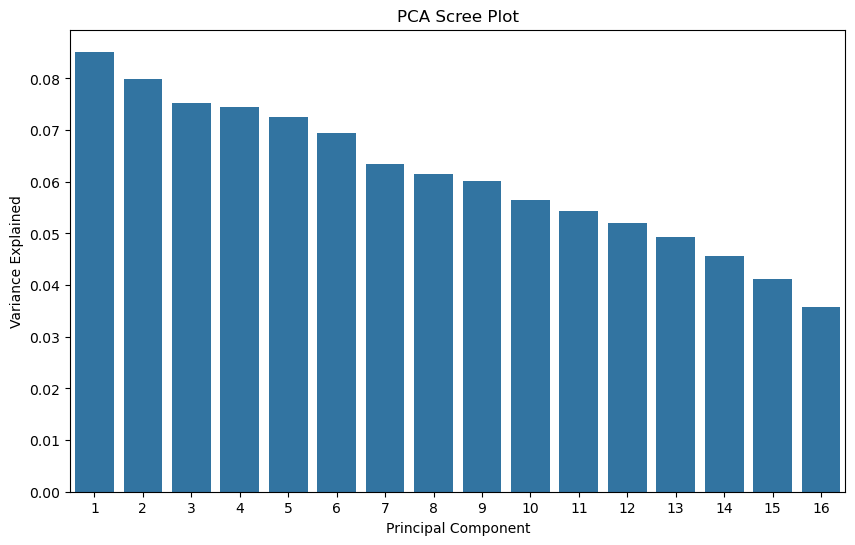

In [136]:
#Plot Scree plot for variance explained by each component
plt.figure(figsize=(10,6))
sns.barplot(x=np.arange(1, len(explained_variance)+1), y=explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot')
plt.show()

Multiple model selection

A. KMeans Clustering

In [140]:
!pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [142]:
#Initialize model
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(processed_data)

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [144]:
#Evaluation
silhouette_kmeans =  silhouette_score(processed_data, labels_kmeans)
db_kmeans = davies_bouldin_score(processed_data, labels_kmeans)
ch_kmeans = calinski_harabasz_score(processed_data, labels_kmeans)

In [146]:
print("KMeans Clustering Evaluation:")
print(f"Silhouette Score:  {silhouette_kmeans: .4f}")
print(f"Davies-Bouldin Index: {db_kmeans: .4f}")
print(f"Calinski-Harabasz Index: {ch_kmeans: .4f}")

KMeans Clustering Evaluation:
Silhouette Score:   0.0966
Davies-Bouldin Index:  2.9281
Calinski-Harabasz Index:  20.6985


B. DBSCAN Clustering

In [149]:
from sklearn.cluster import DBSCAN

In [151]:
#Initialize model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = kmeans.fit_predict(processed_data)

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [153]:
#Evaluation
silhouette_dbscan =  silhouette_score(processed_data, labels_dbscan)
db_dbscan = davies_bouldin_score(processed_data, labels_dbscan)
ch_dbscan = calinski_harabasz_score(processed_data, labels_dbscan)

In [155]:
print("DBSCAN Clustering Evaluation:")
print(f"Silhouette Score:  {silhouette_dbscan: .4f}")
print(f"Davies-Bouldin Index: {db_dbscan: .4f}")
print(f"Calinski-Harabasz Index: {ch_dbscan: .4f}")

DBSCAN Clustering Evaluation:
Silhouette Score:   0.0966
Davies-Bouldin Index:  2.9281
Calinski-Harabasz Index:  20.6985


C. Agglomerative (Hierarchical Clustering)

In [158]:
from sklearn.cluster import AgglomerativeClustering

In [160]:
#Initialize model
agglo= AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(processed_data)

In [162]:
#Evaluation
silhouette_agglo =  silhouette_score(processed_data, labels_agglo)
db_agglo = davies_bouldin_score(processed_data, labels_agglo)
ch_agglo = calinski_harabasz_score(processed_data, labels_agglo)

In [164]:
print("Agglomerative Clustering Evaluation:")
print(f"Silhouette Score:  {silhouette_agglo: .4f}")
print(f"Davies-Bouldin Index: {db_agglo: .4f}")
print(f"Calinski-Harabasz Index: {ch_agglo: .4f}")

Agglomerative Clustering Evaluation:
Silhouette Score:   0.1107
Davies-Bouldin Index:  2.2842
Calinski-Harabasz Index:  20.8183


D. Gaussian Mixture Model (GMM) Clustering

In [167]:
from sklearn.mixture import GaussianMixture

In [169]:
#Initialize model
gmm= GaussianMixture(n_components=3,random_state=42)
labels_gmm = gmm.fit_predict(processed_data)

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [171]:
#Evaluation
silhouette_gmm =  silhouette_score(processed_data, labels_gmm)
db_gmm = davies_bouldin_score(processed_data, labels_gmm)
ch_gmm = calinski_harabasz_score(processed_data, labels_gmm)

In [173]:
print("GMM Clustering Evaluation:")
print(f"Silhouette Score:  {silhouette_gmm: .4f}")
print(f"Davies-Bouldin Index: {db_gmm: .4f}")
print(f"Calinski-Harabasz Index: {ch_gmm: .4f}")

GMM Clustering Evaluation:
Silhouette Score:   0.0966
Davies-Bouldin Index:  2.9281
Calinski-Harabasz Index:  20.6985


E. HDBSCAN Clustering

In [176]:
!pip install hdbscan
import hdbscan

In [178]:
#Initialize model
hdb= hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdb = hdb.fit_predict(processed_data)

In [180]:
#Evaluation
silhouette_hdb =  silhouette_score(processed_data, labels_hdb)
db_hdb = davies_bouldin_score(processed_data, labels_hdb)
ch_hdb = calinski_harabasz_score(processed_data, labels_hdb)

In [182]:
print("HDBSCAN Clustering Evaluation:")
print(f"Silhouette Score:  {silhouette_hdb: .4f}")
print(f"Davies-Bouldin Index: {db_hdb: .4f}")
print(f"Calinski-Harabasz Index: {ch_hdb: .4f}")

HDBSCAN Clustering Evaluation:
Silhouette Score:  -0.1579
Davies-Bouldin Index:  2.9858
Calinski-Harabasz Index:  2.6993


In [184]:
#In Silhouette score we consider near to +1 high values, in davies we consider low and in calinski we consider high values

In [186]:
# From models, i choose Agglomerative clustering & Kmeans clustering are the best perfroming models, so tuning on this models

Hyperparameter tuning using Optuna

1. Hyperparamter tuning for KMeans using optuna

In [190]:
!pip install optuna

In [191]:
def kmeans_objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(processed_data)
    #Evaluate using silhouette score
    score = silhouette_score(processed_data, labels)
    return score

In [194]:
#Create and run optuna study
study_kmeans = optuna.create_study(direction='maximize')
study_kmeans.optimize(kmeans_objective, n_trials=30)

print("Best KMeans n_clusters:", study_kmeans.best_params)
print("Best Silhouette Score:", study_kmeans.best_value)

[I 2025-07-11 10:23:35,363] A new study created in memory with name: no-name-dfda3bcc-c042-41a5-b7c3-76f4d8f57a06
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
[I 2025-07-11 10:23:35,391] Trial 0 finished with value: 0.12113671885056237 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.12113671885056237.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
[I 2025-07-11 10:23:35,484] Trial 1 finished with value: 0.12453946922052897 and parameters: {'n_clusters': 8}. Best is trial 1 with value: 0.1245394

Best KMeans n_clusters: {'n_clusters': 6}
Best Silhouette Score: 0.13446693735665172


In [196]:
#Train final model with best parameters
final_kmeans = KMeans(n_clusters=6)
labels_final = final_kmeans.fit_predict(processed_data)

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [198]:
#Calculate final silhouette score
final_silhouette = silhouette_score(processed_data, labels_final)
print("Final KMeans Clustering:", final_silhouette)

Final KMeans Clustering: 0.1175078710848165


In [200]:
#Before Tuning : 0.966 & After tunung : 0.1175 silhouette_score, performance enhanced with Tuning

2. Hyperparamter tuning for Agglomerative Clustering using optuna

In [203]:
import numpy as np
!pip install optuna

In [205]:
def agglo_objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(processed_data)
    #Evaluate using silhouette score
    score = silhouette_score(processed_data, labels)
    return score

In [207]:
#Create and run optuna study
study_agglo = optuna.create_study(direction='maximize')
study_agglo.optimize(agglo_objective, n_trials=30)

print("Best Agglomerative Clustering params:", study_agglo.best_params)
print("Best Silhouette Score:", study_agglo.best_value)

[I 2025-07-11 10:25:16,964] A new study created in memory with name: no-name-7dc13fc0-28bd-4ea6-b242-f1919846503a
[I 2025-07-11 10:25:16,997] Trial 0 finished with value: 0.11503399098025804 and parameters: {'n_clusters': 2}. Best is trial 0 with value: 0.11503399098025804.
[I 2025-07-11 10:25:17,020] Trial 1 finished with value: 0.11094866206598084 and parameters: {'n_clusters': 7}. Best is trial 0 with value: 0.11503399098025804.
[I 2025-07-11 10:25:17,104] Trial 2 finished with value: 0.11065482843155153 and parameters: {'n_clusters': 3}. Best is trial 0 with value: 0.11503399098025804.
[I 2025-07-11 10:25:17,127] Trial 3 finished with value: 0.11503399098025804 and parameters: {'n_clusters': 2}. Best is trial 0 with value: 0.11503399098025804.
[I 2025-07-11 10:25:17,177] Trial 4 finished with value: 0.10174695676991274 and parameters: {'n_clusters': 10}. Best is trial 0 with value: 0.11503399098025804.
[I 2025-07-11 10:25:17,195] Trial 5 finished with value: 0.10633642468832417 and

Best Agglomerative Clustering params: {'n_clusters': 2}
Best Silhouette Score: 0.11503399098025804


In [209]:
#Train final model with best parameters
best_params = study_agglo.best_params
final_agglo = AgglomerativeClustering(n_clusters=2)
labels_final = final_agglo.fit_predict(processed_data)

In [211]:
#Before Tuning : 0.1107 & After tunung : 0.115 silhouette_score, performance enhanced with Tuning

In [213]:
print(labels_final)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0]


In [215]:
#Calculate final silhouette score
final_silhouette = silhouette_score(processed_data, labels_final)
print("Final Agglomerative Clustering:", final_silhouette)

Final Agglomerative Clustering: 0.11503399098025804


Saving model to Mlflow Registry

In [218]:
import mlflow
import mlflow.sklearn

In [220]:
#Start Mlflow run
with mlflow.start_run(run_name = "Agglomerative_Clustering"):
    #log parameters from best_params
    mlflow.log_param("n_clusters", best_params['n_clusters'])
    #log metrics
    silhouette =  silhouette_score(processed_data, labels_final)
    mlflow.log_metric("silhouette_score", silhouette)
    #log the pipeline model
    mlflow.sklearn.log_model(sk_model=final_agglo, artifact_path="agglo_model", registered_model_name="AgglomerativeClusteringModel")
    print("Agglomerative Clustering Model saved to mlflow & registered successfully.")

2025/07/11 10:27:12 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/07/11 10:27:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

Agglomerative Clustering Model saved to mlflow & registered successfully.


Registered model 'AgglomerativeClusteringModel' already exists. Creating a new version of this model...
Created version '2' of model 'AgglomerativeClusteringModel'.


Model Loading & predicting on sample data

In [223]:
new_data = pd.DataFrame([
    {
        'Sector': 'Technology',
        'Country': 'USA',
        'Market_Cap_Billions': 125.0,
        'Carbon_Emissions': 40.0,
        'Renewable_Energy_Usage': 60.0,
        'Employee_Satisfaction': 82.0,
        'Diversity_Ratio': 0.42,
        'Board_Independence': 0.85,
        'CEO_Compensation_Ratio': 95.0,
        'ROE': 16.0
    },
    {
        'Sector': 'Utilities',
        'Country': 'India',
        'Market_Cap_Billions': 60.0,
        'Carbon_Emissions': 180.0,
        'Renewable_Energy_Usage': 25.0,
        'Employee_Satisfaction': 65.0,
        'Diversity_Ratio': 0.28,
        'Board_Independence': 0.62,
        'CEO_Compensation_Ratio': 120.0,
        'ROE': 9.0
    }
])

In [225]:
print(new_data)

       Sector Country  Market_Cap_Billions  Carbon_Emissions  \
0  Technology     USA                125.0              40.0   
1   Utilities   India                 60.0             180.0   

   Renewable_Energy_Usage  Employee_Satisfaction  Diversity_Ratio  \
0                    60.0                   82.0             0.42   
1                    25.0                   65.0             0.28   

   Board_Independence  CEO_Compensation_Ratio   ROE  
0                0.85                    95.0  16.0  
1                0.62                   120.0   9.0  


In [227]:
#model loading for predictions on sample
import mlflow.pyfunc
model = mlflow.sklearn.load_model (model_uri="models:/AgglomerativeClusteringModel/2")

In [229]:
new_data.dtypes

Sector                     object
Country                    object
Market_Cap_Billions       float64
Carbon_Emissions          float64
Renewable_Energy_Usage    float64
Employee_Satisfaction     float64
Diversity_Ratio           float64
Board_Independence        float64
CEO_Compensation_Ratio    float64
ROE                       float64
dtype: object

In [231]:
new_data['Sector'] = new_data['Sector'].astype('category')
new_data['Country'] = new_data['Country'].astype('category')

In [233]:
new_data.dtypes

Sector                    category
Country                   category
Market_Cap_Billions        float64
Carbon_Emissions           float64
Renewable_Energy_Usage     float64
Employee_Satisfaction      float64
Diversity_Ratio            float64
Board_Independence         float64
CEO_Compensation_Ratio     float64
ROE                        float64
dtype: object

In [235]:
new_data.columns

Index(['Sector', 'Country', 'Market_Cap_Billions', 'Carbon_Emissions',
       'Renewable_Energy_Usage', 'Employee_Satisfaction', 'Diversity_Ratio',
       'Board_Independence', 'CEO_Compensation_Ratio', 'ROE'],
      dtype='object')

In [237]:
#Column names are not matching with Caps, so decode it now.
new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ','_')

In [239]:
new_data.columns

Index(['sector', 'country', 'market_cap_billions', 'carbon_emissions',
       'renewable_energy_usage', 'employee_satisfaction', 'diversity_ratio',
       'board_independence', 'ceo_compensation_ratio', 'roe'],
      dtype='object')

In [241]:
processed_new = pipeline.fit_transform(new_data)

In [243]:
#Prediction on sample new data
predict = model.fit_predict(processed_new)

In [245]:
print(predict)

[1 0]


Streamlit GUI creation

In [248]:
model = mlflow.sklearn.load_model (model_uri="models:/AgglomerativeClusteringModel/1")
import streamlit as st
import mlflow.sklearn
st.title("ESG Clustering App")
#choose mode as file uploading
st.write("Upload a CSV file containing required features to cluster ESG data.")
uploaded_file = st.file_uploader("Upload input CSV file", type=["csv"])
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
    st.write("Uploaded Data Preview:", input_df.head())
    if st.button("Cluster ESG data"):
        try:
            clustering = model.predict(input_df)
            input_df['Cluster_ESG_data']= clustering
            st.success("Clustering generated successfully!")
            st.write(input_df)
            csv=input_df.to_csv(index=False).encode('utf-8')
            st.download_button("Download Clusterings", csv,"esg_clusterings.csv", "text/csv")
        except Exception as e:
            st.error(f"Error during clustering: {e}")
            st.info("Please upload a csv file to begin.")

2025-07-11 10:28:30.748 
  command:

    streamlit run C:\Users\venuk\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
